# Проект: принятие решений в бизнесе

**Описание проекта:**

Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты.

**Ход исследования:**

1. С помощью фреймворков `ICE` и `RICE` произвести приоретизацию гипотез. Объяснить разницу этих фреймворков,
2. Проанализировать A/B - тест:
    - Построим график кумулятивной выручки по группам,
    - Построим график кумулятивного среднего чека по группам,
    - Построим график относительного изменения кумулятивного среднего чека группы B к группе A,
    - Построим график кумулятивного среднего количества заказов на посетителя по группам,
    - Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A,
    - Построим точечный график количества заказов по пользователям,
    - Посчитаем 95-й и 99-й перцентили количества заказов на пользователя и выберем границу для определения аномальных пользователей,
    - Построим точечный график стоимостей заказов,
    - Посчитаем 95-й и 99-й перцентили стоимости заказов и Выберем границу для определения аномальных заказов,
    - Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным,
    - Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным,
    - Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным,
    - Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным,
    - Примем решение по результатам теста.

## Приоритизация гипотез

В файле `/datasets/hypothesis.csv` 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами `Reach`, `Impact`, `Confidence`, `Effort`.

Импортируем необходимые библиотеки и загрузим данный датасет:

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import math as mth
from scipy import stats
import numpy as np
import datetime as dt
from pandas.plotting import register_matplotlib_converters
import warnings

In [6]:
try:
    hypothesis = pd.read_csv('/datasets/hypothesis.csv')
except:
    hypothesis = pd.read_csv('https://code.s3.yandex.net/datasets/hypothesis.csv')

Выведем датафрейм:

In [8]:
pd.set_option('display.max_colwidth', None)
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


Пропусков и дубликатов нет, предобработка не требуется.

### Применим фреймворк `ICE` для приоритизации гипотез. Отсортируем их по убыванию приоритета.

In [11]:
hypothesis['ICE'] = round(hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts'], 2)
display(hypothesis[['Hypothesis', 'ICE']].sort_values('ICE', ascending=False))

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


### Применим фреймворк `RICE` для приоритизации гипотез. Отсортируем их по убыванию приоритета.

In [13]:
hypothesis['RICE'] = round(hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts'], 2)
display(hypothesis[['Hypothesis', 'RICE']].sort_values('RICE', ascending=False))

,Hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


Мы видим, что приоритет гипотез при применении разных фреймворков отличается. Это связано с тем, что фреймворк `RICE` помимо "силы" гипотезы учитывает так же охват (количество пользователей, которыз она затронет).

**В данном пункте была произведена приоретизация гипотез:**

- При использовании фреймворка `ICE` наиболее перспективными гипотезами являются:
    - Запустить акцию, дающую скидку на товар в день рождения,
    - Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей,
    - Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок;
- При использовании фреймворка `RICE` наиболее перспективными гипотезами являются:
    - Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок,
    - Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа,
    - Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей;
- Разница в приоритезации гипотез при использовании разных фреймворков объясняется разным охватом гипотез. Фреймворк `RICE` учитывает данный фактор, а `ICE` нет.

## Анализ A/B-теста

Был проведен A/B-тест и получены результаты, которые описаны в файлах `/datasets/orders.csv` и `/datasets/visitors.csv`. Загрузим эти датафреймы и выведем общую информацию о них. Для этого объявим функцию, которая будет выводить общую информацию о датафрейме:

In [18]:
try:
    orders = pd.read_csv('/datasets/orders.csv')
except:
    orders = pd.read_csv('https://code.s3.yandex.net/datasets/orders.csv')
try:
    visitors = pd.read_csv('/datasets/visitors.csv')
except:
    visitors = pd.read_csv('https://code.s3.yandex.net/datasets/visitors.csv')

In [19]:
def df_info(df):
    print('Общая информация')
    print(df.info(), '\n')
    print('Первые 5 строк')
    display(df.head(5))
    print('Абсолютное число пропусков')
    print(df.isna().sum(), '\n')
    if df.isna().sum().sum() > 0:
        print('Корреляция пропусков')
        display(df.isnull().corr())
    print('Количество явных дубликатов')
    print(df.duplicated().sum(), '\n')
    print('Количество групп')
    print(df['group'].nunique(), df['group'].unique(), '\n')
    print('Даты проведения теста')
    print('От:', df['date'].min(), 'До:', df['date'].max(), '\n')

In [20]:
for i in [orders, visitors]:
    df_info(i)

Общая информация
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
None 

Первые 5 строк


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


Абсолютное число пропусков
transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64 

Количество явных дубликатов
0 

Количество групп
2 ['B' 'A'] 

Даты проведения теста
От: 2019-08-01 До: 2019-08-31 

Общая информация
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB
None 

Первые 5 строк


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


Абсолютное число пропусков
date        0
group       0
visitors    0
dtype: int64 

Количество явных дубликатов
0 

Количество групп
2 ['A' 'B'] 

Даты проведения теста
От: 2019-08-01 До: 2019-08-31 



Проверим количество пользователей в каждой группе по таблице с заказами:

In [22]:
test_group = orders.groupby('group', as_index=False).agg({'visitorId': 'nunique'})
test_group

,group,visitorId
0,A,503
1,B,586


Проверим вероятность попасть попадания пользователя в группу `A`:

In [24]:
round(
    test_group[test_group['group'] == 'A']['visitorId'][0] / 
(test_group[test_group['group'] == 'A']['visitorId'][0] + test_group[test_group['group'] == 'B']['visitorId'][1]) *
    100, 2
)

46.19

Проверим вероятность попасть попадания пользователя в группу `B`:

In [26]:
round(
    test_group[test_group['group'] == 'B']['visitorId'][1] / 
(test_group[test_group['group'] == 'A']['visitorId'][0] + test_group[test_group['group'] == 'B']['visitorId'][1]) *
    100, 2
)

53.81

Пропусков и явных дубликатов нет. Необходимо привести к типу `date` столбцы с датами:

In [28]:
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

### Построим график кумулятивной выручки по группам

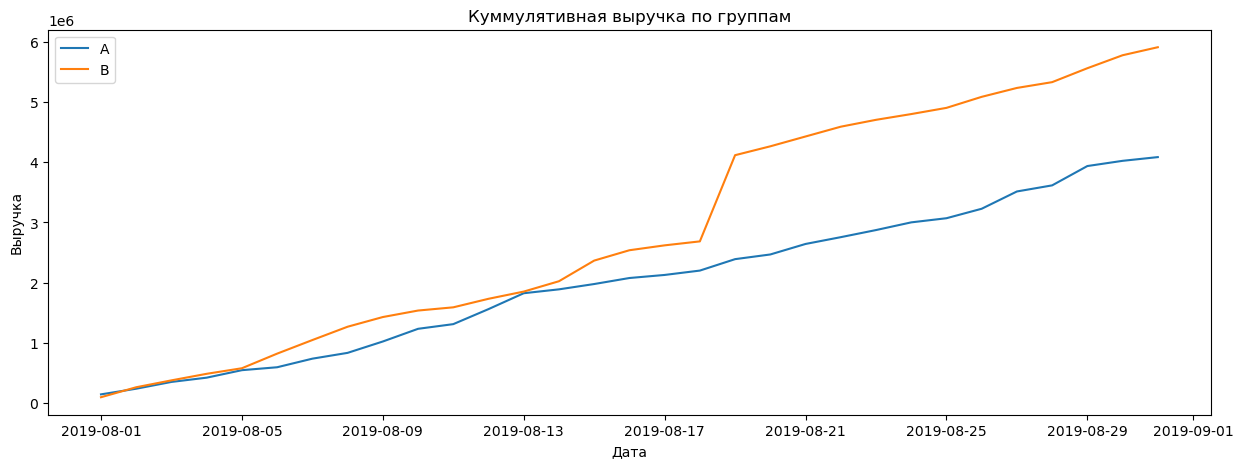

In [30]:
register_matplotlib_converters()
datesGroups = orders[['date', 'group']].drop_duplicates()

ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transactionId': 'nunique',
            'visitorId': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]
plt.figure(figsize=(15, 5))
plt.title('Куммулятивная выручка по группам')
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.legend()
plt.xlabel("Дата")
plt.ylabel("Выручка")
plt.show()

Видим, что выручка в тестовой группе немного опережала контрольную, но `2019-08-19` происходит аномально большой заказ, в результате чего тестовая группа сильно вырывается вперед. После крупного заказа куммулятивная выручка в контрольной и тестовой группах растет примерно одинаково.

### Построим график кумулятивного среднего чека по группам

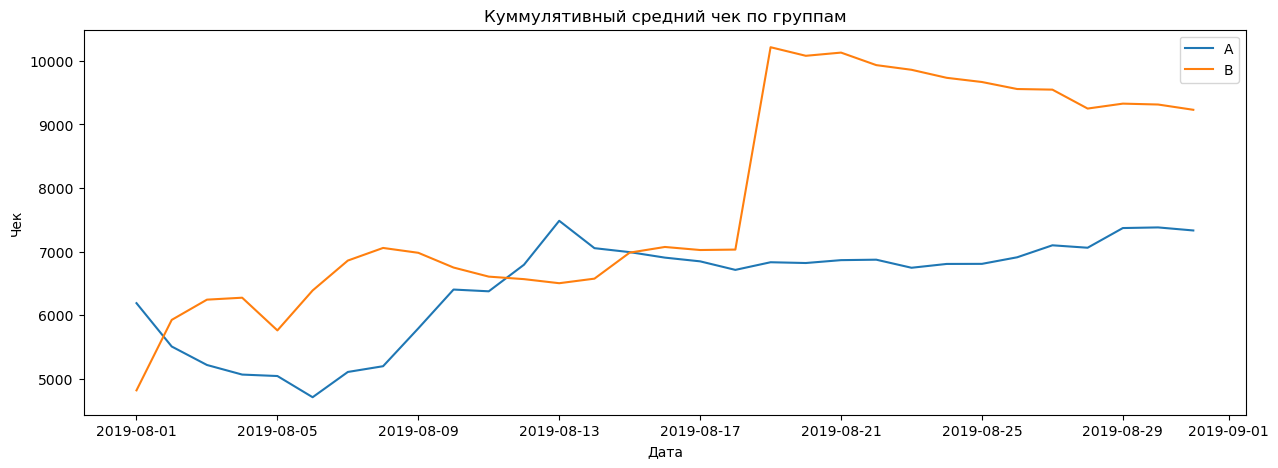

In [33]:
plt.figure(figsize=(15, 5))
plt.title('Куммулятивный средний чек по группам')
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend() 
plt.xlabel("Дата")
plt.ylabel("Чек")
plt.show()

В начале теста средний чек колеблется в обеих группах, затем, после аномально большого заказа `2019-08-19`, тестовая группа начинает сильно опережать контрольную, но далее наблюдается тенденция на небольшое сокращение разницы между тестовой и контрольной группами.

### Построим график относительного изменения кумулятивного среднего чека группы B к группе A

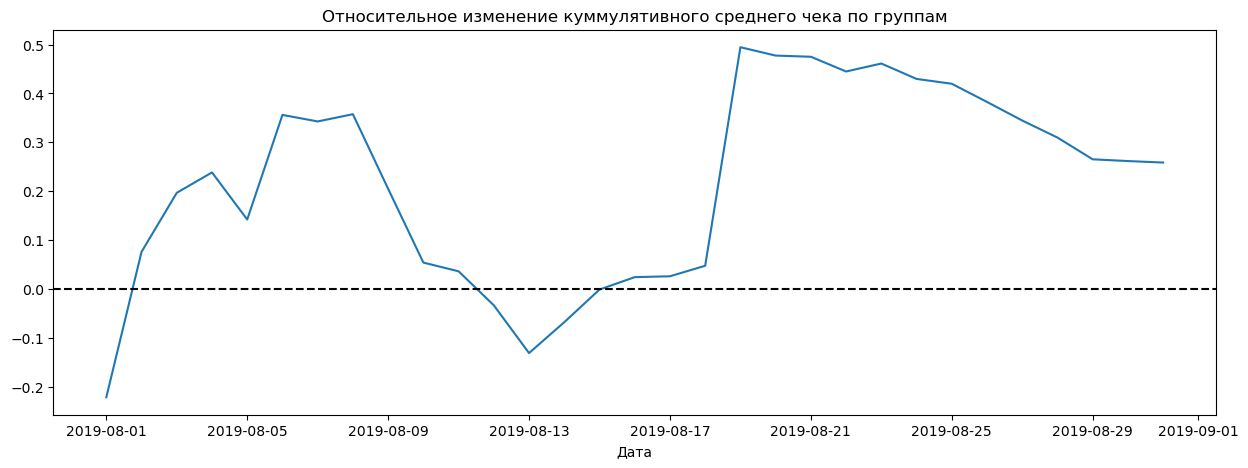

In [36]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(15, 5))
plt.title('Относительное изменение куммулятивного среднего чека по группам')
plt.plot(
    mergedCumulativeRevenue['date'],
    (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1
)
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel("Дата")
plt.show()

Видим так же колебания среднего чека и выброс, описанный выше.

### Построим график кумулятивного среднего количества заказов на посетителя по группам

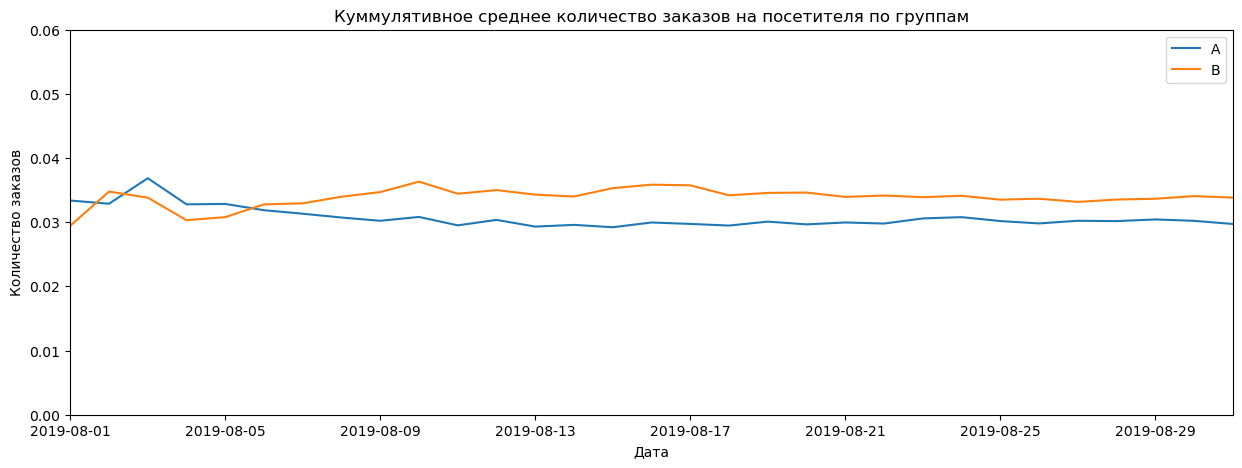

In [39]:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']
plt.figure(figsize=(15, 5))
plt.title('Куммулятивное среднее количество заказов на посетителя по группам')
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 8, 31), 0, 0.06])
plt.xlabel("Дата")
plt.ylabel("Количество заказов")
plt.show()

Первые дни теста мы видим колебания среднего количества заказов на посетителя в обеих группах, но постепенно оба сегмента выровнялись, при чем тестовая группа на уровне несколько большем, чем контрольная.

### Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A.

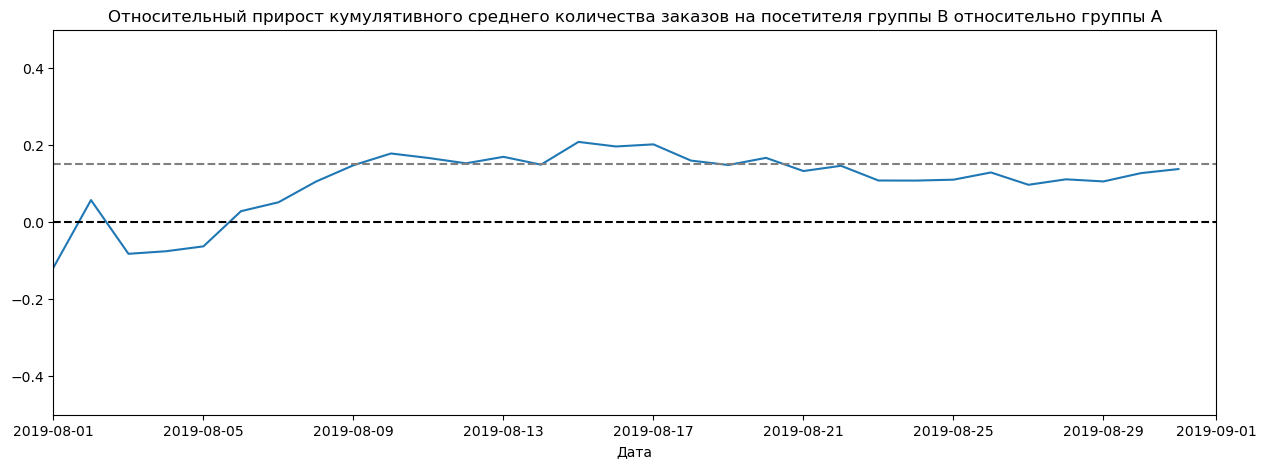

In [42]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(15, 5))
plt.title('Относительный прирост кумулятивного среднего количества заказов на посетителя группы B относительно группы A')
plt.plot(
    mergedCumulativeConversions['date'],
    mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1
)
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.15, color='grey', linestyle='--')
plt.axis(["2019-08-01", '2019-09-01', -0.5, 0.5])
plt.xlabel("Дата")
plt.show()

После колебаний в начале теста группа `B` лидирует по метрике: становится лучше, либо зафиксировалась на приросте около `15%`.

### Построим точечный график количества заказов по пользователям

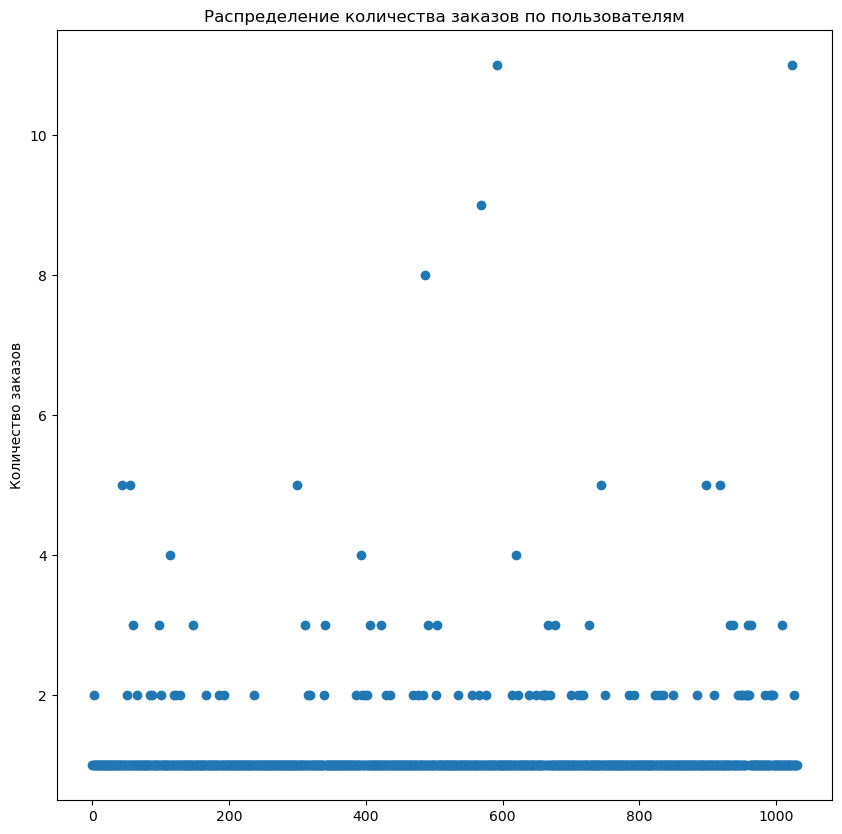

In [45]:
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)
ordersByUsers.columns = ['userId', 'orders']
x_values = pd.Series(range(0, len(ordersByUsers)))
plt.figure(figsize=(10, 10))
plt.title('Распределение количества заказов по пользователям')
plt.scatter(x_values, ordersByUsers['orders'])
plt.ylabel("Количество заказов")
plt.show()

Пользователей, заказавших более 2 раз очень мало. Посчитаем перцентили.

### Посчитаем 95-й и 99-й перцентили количества заказов на пользователя

In [48]:
print(np.percentile(ordersByUsers['orders'], [95, 99]))

[2. 4.]


Не более `5%` пользователей совершали более `2` заказов. И не более `1%` пользователей делали более 4 заказов. **Примем за границу нормальных заказов 3 заказа на пользователя.**

### Построим точечный график стоимостей заказов

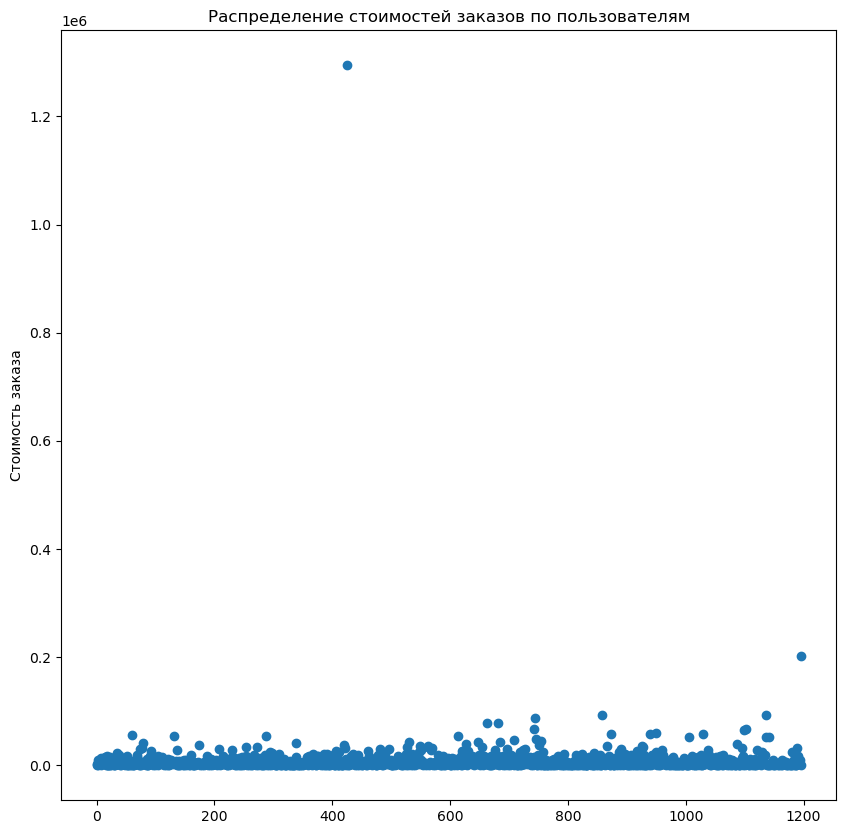

In [51]:
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.figure(figsize=(10, 10))
plt.title('Распределение стоимостей заказов по пользователям')
plt.scatter(x_values, orders['revenue'])
plt.ylabel("Стоимость заказа")
plt.show()

Имеем всего `2` заказа стоимостью больше `200000`. Посчитаем перцентили.

### Посчитаем 95-й и 99-й перцентили стоимости заказов

In [54]:
print(np.percentile(orders['revenue'], [95, 99]))

[28000.  58233.2]


Не более, чем у `5%` заказов чек был больше `28000`. И не более `1%` - дороже `58233,2`. **Примем за порог отсечения аномальных заказов чек в `35000`**.

### Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным

**Сформулируем нулевую и альтернативную гипотезы:**

- Н0 - среднее количество заказов на посетителя в группе `A` и группе `B` одинаково;
- Н1 - среднее количество заказов на посетителя в группе `A` и группе `B` разное.

In [58]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print('P-value:', "{0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print('Относительное различие групп:', "{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

P-value: 0.01679
Относительное различие групп: 0.138


P-value меньше 0,05, поэтому гипотезу о равенстве количества заказов на посетителя в пользу гипотезы о том, что `количество заказов на посетителя в группе В выше`. По "сырым данным" делаем вывод, что в среднем количестве заказов между группами есть статистически значимые различия. Относительный прирост группы `B` составляет `13,8%`.

### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным

**Сформулируем нулевую и альтернативную гипотезы:**

- Н0 - средний чек заказа в группе `A` и группе `B` одинаковый;
- Н1 - средний чек заказа в группе `A` и группе `B` разный.

In [62]:
print('P-value:', '{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Относительное различие групп:', '{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

P-value: 0.729
Относительное различие групп: 0.259


При большом относительном различии `25,9%` получаем очень высокий p-value `0,729`, то есть по "сырым данным" мы не можем отвергнуть нулевую гипотезу об однородности тестовой и контрольной групп.

### Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным

**Сформулируем нулевую и альтернативную гипотезы:**

- Н0 - среднее количество заказов на посетителя в группе `A` и группе `B` одинаково;
- Н1 - среднее количество заказов на посетителя в группе `A` и группе `B` разное.

Примем за аномальных пользователей тех, кто сделал `4` заказа и более, или совершил заказ на сумму более `35000`. Так мы уберем `1%` пользователей с наибольшим числом заказов и от `1%` до `5%` заказов с наибольшей стоимостью.

In [67]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 3]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > 3]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 35000]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print('P-value:', '{0:.5f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Относительное различие групп:', '{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

P-value: 0.01390
Относительное различие групп: 0.155


Как и в случае с сырыми данными статистическая значимость достигнута.

### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным

**Сформулируем нулевую и альтернативную гипотезы:**

- Н0 - средний чек заказа в группе `A` и группе `B` одинаковый;
- Н1 - средний чек заказа в группе `A` и группе `B` разный.

In [71]:
print('P-value:',
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print('Относительное различие групп:',
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

P-value: 0.874
Относительное различие групп: 0.025


Различий между группами по "очищенным данным" практически нет.

### Вывод по результатам A/B - теста

**Подведем итоги:**
- Выручка в тестовой группе немного опережает контрольную,
- Нет статистической значимости различий в среднем чеке и по "сырым", и по "очищенным" данным,
- Есть статистическая значимость различий в среднем количестве заказов на посетителя (аплифт `15,5%`).

Таким образом, при неизменном среднем чеке было увеличено количество заказов на пользователя, что приведет к увеличению выручки и прибыли. Считаю целесообразным остановить тест и зафиксировать победу группы `B`.

**В данной работе была произведена приоритезация гипотез и проанализированы результаты A/B - теста:**

- Применены фреймворки `ICE` и `RICE` для приоритезации гипотез и объяснена разница в получившихся результатах,
- Произведен анализ A/B-теста и по результатам анализа принято решение зафиксировать победу группы `B`.